In this module we will look at Structure Learning in Bayes Networks using Pomegranate Library.<br>

Structure Learning is broadly classified into 3 main approaches:
1. **Score-based Learning**<br>
Exact Learning:<br>
&emsp;Search over the space of all possible directed acyclic graphs and find the one that minimizes some objective function. <br>
&emsp;It learns the structure by turning the bayesian network structure learning problem into a shortest path problem. <br>
&emsp;A* algorithm can be used to smartly search the space and reduce computational time. <br>
Approximate Learning:<br>
&emsp;Several heuristics have been developed with different properties to yield good structures in a reasonable amount of time.<br>
&emsp;Methods such as greedy search heuristics and Chow-Liu tree building.<br>
<br>
3. **Constraint Based Learning**<br>
&emsp; These methods typically involve calculating some measure of correlation or co-occurrence to identify an undirected backbone of edges that could exist, and then prune these edges systematically until a DAG is reached.


In [1]:
from pomegranate import BayesianNetwork
import matplotlib.pyplot as plt
import networkx as nx
import numpy
numpy.random.seed(6)

# define some random data for 10 nodes
X = numpy.random.randint(2, size=(2000, 10))
X

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 1]])

In [2]:
# build some relationships between the 10 nodes
X[:,1] = X[:,0]
X[:,3] = X[:,2]
X[:,4] = X[:,1]+X[:,3]
X[:,7] = X[:,3]+X[:,5]+X[:,6]
X[:,9] = X[:,5]*X[:,6]*X[:,8]
X

array([[0, 0, 1, ..., 3, 0, 0],
       [1, 1, 1, ..., 2, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 2, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 2, 1, 1]])

#### Exact Learning
Two algorithms for performing search-and-score were mentioned, the traditional shortest path algorithm and the A* algorithm. <br>
Structure learning in pomegranate is done using the from_samples method. <br>
All you pass in is the samples, and the algorithm which you'd like to use; <br>
It will learn the network using the dynamic programming implementation.<br>

((), (0,), (), (2,), (1, 3), (), (), (3, 5, 6), (), (5, 6, 8))


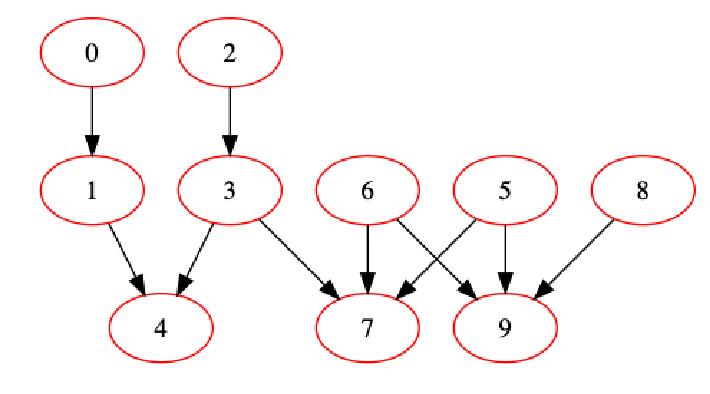

In [3]:
# lets look at structure learning using traditional shortest path algorithm
model = BayesianNetwork.from_samples(X, algorithm='exact-dp')
print(model.structure)
plt.figure(figsize=(12, 10))
model.plot()
plt.show()

((), (0,), (), (2,), (1, 3), (), (), (3, 5, 6), (), (5, 6, 8))


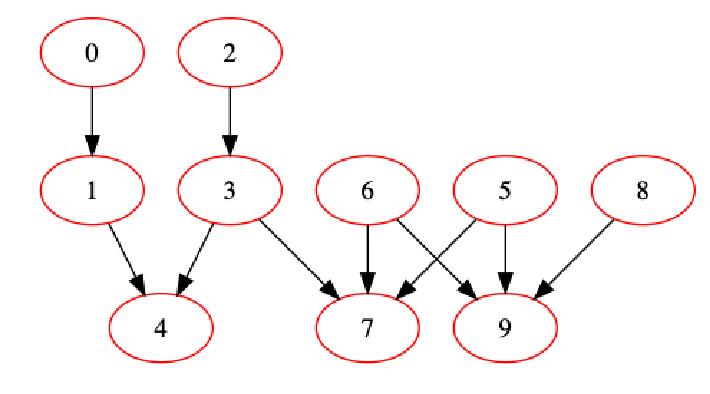

In [4]:
# A* search
model = BayesianNetwork.from_samples(X, algorithm='exact')
print(model.structure)
plt.figure(figsize=(12, 10))
model.plot()
plt.show()

#### Approximate Algorithms
Greedy Search: <br>
&emsp;Iteratively finds the best variable to add to the growing topological sort, allowing the new variable to draw only from variables already in the topological sort. <br>
&emsp;This is the default in pomegranate.<br>
<br>
Chow-Liu Trees:<br>
&emsp;However, there are even cases where the greedy heuristic is too slow, for example hundreds of variables. <br>
&emsp;One of the first heuristics for BNSL is that of Chow-Liu trees, which learns the optimal tree from data. <br>
&emsp;Essentially it calculates the mutual information between all pairs of variables and then finds the maximum spanning tree.



((), (0,), (), (2,), (1, 3), (9,), (5, 8, 9), (3, 5, 6), (5, 9), ())


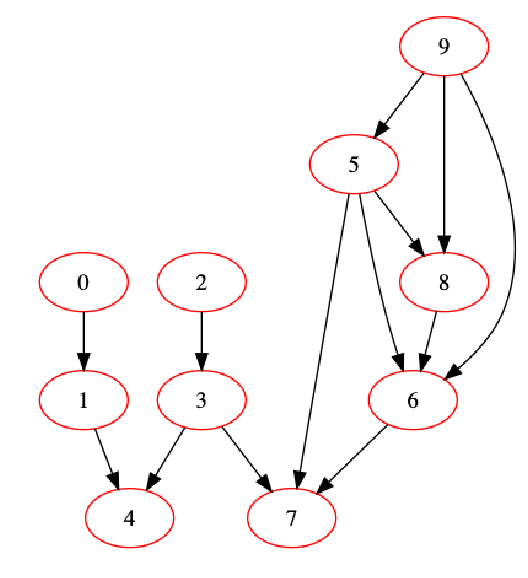

In [5]:
# Greedy Search
model = BayesianNetwork.from_samples(X)
print(model.structure)
plt.figure(figsize=(12, 10))
model.plot()
plt.show()

((), (0,), (4,), (2,), (0,), (7,), (7,), (2,), (9,), (7,))


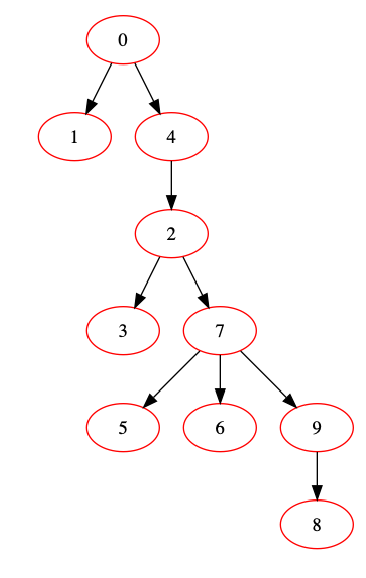

In [6]:
# Chow-Liu algorithm
model = BayesianNetwork.from_samples(X, algorithm='chow-liu')
print(model.structure)
plt.figure(figsize=(12, 10))
model.plot()
plt.show()

#### Constraint Based Learning
&emsp;Sometimes you have prior information about how groups of nodes are connected to each other and want to exploit that.<br>
&emsp;For example you have layers in your network where variables are a part of these layers and can only have parents in another layer.

Constraint Graph


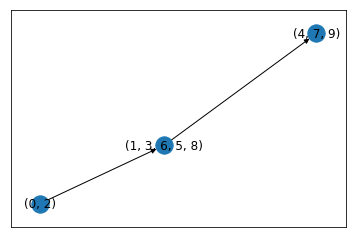

Learned Bayesian Network


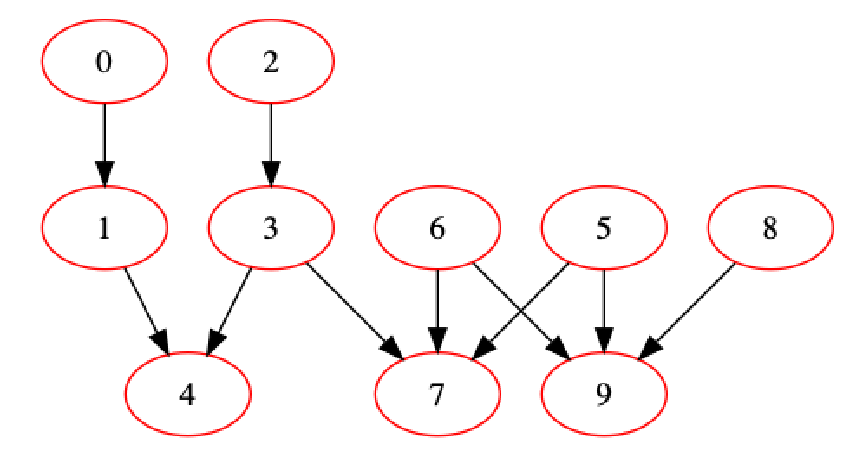

In [11]:
# lets create an empty DiGraph object as our constraints
a = nx.DiGraph()
# here we are adding the set of nodes associated to each layer
# you can change this and see how it behaves; we will see one example
b = tuple((0, 2))
c = tuple((1,3,6,5,8))
d = tuple((4,7,9))

# building a constraint graph by adding the layers
a.add_edge(b, c)
a.add_edge(c, d)
print("Constraint Graph")
nx.draw_networkx(a)
plt.show()

print("Learned Bayesian Network")

model = BayesianNetwork.from_samples(X, algorithm='exact', constraint_graph=a)

plt.figure(figsize=(16, 8))
model.plot()
plt.show()

Constraint Graph


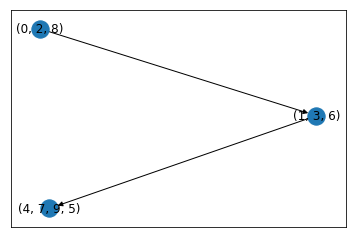

Learned Bayesian Network


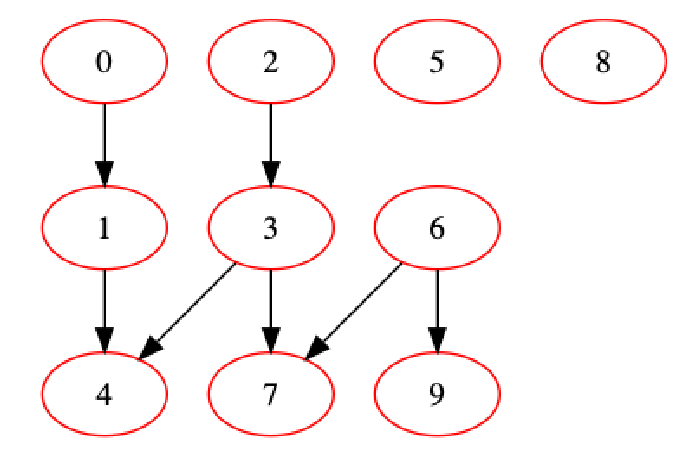

In [14]:
# lets change the nodes in the layers and see what happens
a = nx.DiGraph()
b = tuple((0,2,8))
c = tuple((1,3,6))
d = tuple((4,7,9,5))

# building a constraint graph by adding the layers
a.add_edge(b, c)
a.add_edge(c, d)
print("Constraint Graph")
nx.draw_networkx(a)
plt.show()

print("Learned Bayesian Network")

model = BayesianNetwork.from_samples(X, algorithm='exact', constraint_graph=a)

plt.figure(figsize=(16, 8))
model.plot()
plt.show()

As you can see it captures the relation between the various nodes correctly even when the prior information on constraints was inaccurate.<br>
<br>

In this notebook, we have looked at various algorithms for structure learning.
